In [82]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import koreanize_matplotlib
from tabulate import tabulate


In [83]:
# def LG_D():
url1='https://finance.naver.com/item/coinfo.naver?code=034220'
driver = webdriver.Chrome()  # 웹 드라이버 선택 (예: Chrome)
driver.get(url1)  # 접근할 웹 페이지의 URL 입력

driver.switch_to.frame("coinfo_cp") # iframe 내부로 전환

html = driver.page_source
soup =BeautifulSoup(html,'html.parser')
tbody_tag = soup.find_all('tbody')
tbody_tag


[<tbody><tr class="cmp-table-row">
 <td class="cmp-table-cell td0101">
 <dl>
 <dt>
 <span class="name">LG디스플레이</span>
 <a class="cEm" href="http://www.lgdisplay.com" target="comPage" title="[홈페이지] www.lgdisplay.com"><img align="absmiddle" hspace="3" src="/images/icon_home.gif"/></a>
 <a class="cEm" title="[대표전화] 02-3777-1010 
 [주식담당] 02-3777-1010"><img align="absmiddle" hspace="1" src="/images/icon_tel.gif"/></a>
 <b class="num">034220</b>
 </dt>
 <dt class="line-left">LG Display</dt>
 <dt class="line-left">KOSPI : 전기전자</dt>
 <dt class="line-left">WICS : 디스플레이패널</dt>
 </dl>
 </td>
 </tr>
 <tr class="cmp-table-row">
 <td class="cmp-table-cell td0201">
 <div> </div>
 </td>
 </tr>
 <tr class="cmp-table-row">
 <td class="cmp-table-cell td0301">
 <dl>
 <dt>EPS <b class="num">-5,750</b></dt>
 <dt class="line-left">BPS <b class="num">15,877</b></dt>
 <dt class="line-left">PER <b class="num">N/A</b></dt>
 <dt class="line-left">업종PER <b class="num">N/A</b></dt>
 <dt class="line-left">PBR <b cla

In [84]:
text_data = tbody_tag[17].text
text_data

'\n2021(A)\n298,780\n23.15\n22,306\n11,862\n2,996\n7.59\n0.69\n9.68\n2.56\n57.32\nIFRS연결\n2022(A)\n261,518\n-12.47\n-20,850\n-30,716\n-7,758\nN/A\n0.46\n-26.71\n6.46\n101.75\nIFRS연결\n2023(A)\n213,308\n-18.43\n-25,102\n-27,337\n-6,905\nN/A\n0.64\n-31.95\n10.56\n153.23\nIFRS연결\n2024(E)\n274,626\n28.75\n-2,045\n-10,809\n-2,294\nN/A\n0.78\n-15.11\n3.50\n128.22\nIFRS연결\n2025(E)\n279,037\n1.61\n5,240\n160\n32\n347.12\n0.77\n0.22\n3.10\n109.05\nIFRS연결\n\n'

In [85]:
# 정규식으로 데이터 쪼개기
item_list = []
remove_span = re.split(r'\n|\n', text_data)
for word in remove_span:
    if word !='':
        item_list.append(word)

item_list

['2021(A)',
 '298,780',
 '23.15',
 '22,306',
 '11,862',
 '2,996',
 '7.59',
 '0.69',
 '9.68',
 '2.56',
 '57.32',
 'IFRS연결',
 '2022(A)',
 '261,518',
 '-12.47',
 '-20,850',
 '-30,716',
 '-7,758',
 'N/A',
 '0.46',
 '-26.71',
 '6.46',
 '101.75',
 'IFRS연결',
 '2023(A)',
 '213,308',
 '-18.43',
 '-25,102',
 '-27,337',
 '-6,905',
 'N/A',
 '0.64',
 '-31.95',
 '10.56',
 '153.23',
 'IFRS연결',
 '2024(E)',
 '274,626',
 '28.75',
 '-2,045',
 '-10,809',
 '-2,294',
 'N/A',
 '0.78',
 '-15.11',
 '3.50',
 '128.22',
 'IFRS연결',
 '2025(E)',
 '279,037',
 '1.61',
 '5,240',
 '160',
 '32',
 '347.12',
 '0.77',
 '0.22',
 '3.10',
 '109.05',
 'IFRS연결']

In [86]:
# value_dict 만들기
value_dict = {'영업이익':[item_list[3],item_list[15],item_list[27]],
              'PER':[item_list[6],item_list[18],item_list[30]],
              'PBR':[item_list[7],item_list[19],item_list[31]],
              'ROE':[item_list[8],item_list[20],item_list[21]]}
value_dict
value_DF

,영업이익,PER,PBR,ROE
2021,22306.0,7.59,0.69,9.68
2022,-20850.0,0.00,0.46,-26.71
2023,-25102.0,0.00,0.64,6.46


In [87]:
value_DF=pd.DataFrame(value_dict,index=['2021','2022','2023'])
value_DF= value_DF.replace(to_replace='N/A', value=0)
# N/A값 >> 영업이익이 마이너스이기에 na값으로 둔다는걸로 추정

In [88]:
value_DF['영업이익'] = value_DF['영업이익'].str.replace(',', '')

In [89]:
value_DF = value_DF.astype(float)

In [90]:
value_DF

,영업이익,PER,PBR,ROE
2021,22306.0,7.59,0.69,9.68
2022,-20850.0,0.00,0.46,-26.71
2023,-25102.0,0.00,0.64,6.46


In [91]:
for i in value_DF.columns:
    print(value_DF[f'{i}'])

2021    22306.0
2022   -20850.0
2023   -25102.0
Name: 영업이익, dtype: float64
2021    7.59
2022    0.00
2023    0.00
Name: PER, dtype: float64
2021    0.69
2022    0.46
2023    0.64
Name: PBR, dtype: float64
2021     9.68
2022   -26.71
2023     6.46
Name: ROE, dtype: float64


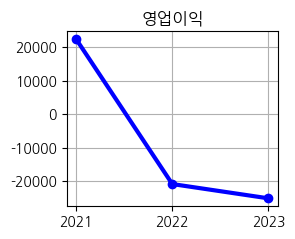

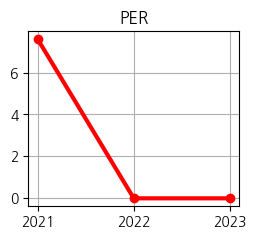

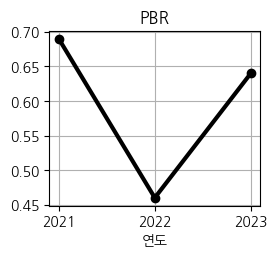

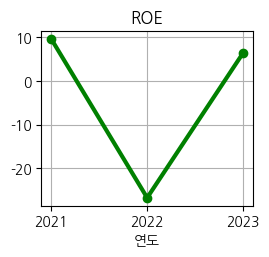

In [92]:
j=1
color=['blue', 'red', 'black', 'green']
for i in value_DF.columns:
    plt.figure(figsize=(6,5))
    plt.subplot(2,2,j)
    plt.plot(value_DF[f'{i}'], marker='o',color=color[j-1],linewidth=3)
    j +=1
    # 그래프 설정
    plt.title(f'{i}')
    if j>3:
        plt.xlabel('연도')
    plt.grid(True)

    # 그래프 출력
    plt.show()
